In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

# load csv
data = pd.read_csv('hpv1e.csv')
data.shape


(37, 7)

In [4]:
data

OutputPower   ACVa  ACVb  ACVc  ACFreq  ACOutputCurrentA  TotalOutputPower
0          0.00  232.0     0     0    59.9               0.1               701
1          0.23  232.7     0     0    59.9               1.2               701
2          0.59  233.4     0     0    59.9               2.6               702
3          1.79  235.4     0     0    59.9               7.6               704
4          2.75  235.4     0     0    59.9              11.6               706
5          2.75  235.4     0     0    59.9              11.6               706
6          3.49  235.2     0     0    60.0              14.8               710
7          3.82  235.1     0     0    59.9              16.2               714
8          2.56  233.7     0     0    59.9              10.9               716
9          3.20  234.8     0     0    59.9              13.6               719
10         2.52  233.3     0     0    60.0              10.8               722
11         1.78  232.8     0     0    59.9               7.6               723
12         0.84  232.4     0     0    59.9               3.7               724
13         0.12  231.8     0     0    59.9               1.0               724
14         0.12  231.8     0     0    59.9               1.0               724
15         0.12  231.8     0     0    59.9               1.0               724
16         0.00  231.7     0     0    59.9               0.1               724
17         0.25  232.2     0     0    59.9               1.3               725
18         1.23  233.7     0     0    60.0               5.3               726
19         2.25  237.5     0     0    59.9               9.5               728
20         2.68  236.6     0     0    59.9              11.3               731
21         2.46  234.9     0     0    59.9              10.4               733
22         3.07  235.1     0     0    60.0              13.0               736
23         3.67  235.4     0     0    59.9              15.6               740
24         3.46  234.8     0     0    59.9              14.7               743
25         2.93  234.3     0     0    60.0              12.5               746
26         2.18  234.2     0     0    59.9               9.3               748
27         0.99  233.3     0     0    60.0               4.3               749
28         0.19  231.8     0     0    60.0               1.1               750
29         0.19  231.8     0     0    60.0               1.1               750
30         0.19  231.8     0     0    60.0               1.1               750
31         0.00  231.6     0     0    59.9               0.1               750
32         0.28  231.7     0     0    60.0               1.4               750
33         1.30  233.8     0     0    60.0               5.6               751
34         2.40  235.4     0     0    59.9              10.2               754
35         1.48  232.8     0     0    59.9               6.3               755
36         1.15  231.8     0     0    59.9               5.0               756

In [36]:
X = data[['ACVa','ACOutputCurrentA','ACVb','TotalOutputPower']]
X.head()

ACVa  ACOutputCurrentA  ACVb  TotalOutputPower
0  232.0               0.1     0               701
1  232.7               1.2     0               701
2  233.4               2.6     0               702
3  235.4               7.6     0               704
4  235.4              11.6     0               706

In [37]:
y = data[['OutputPower']]
y.head()

OutputPower
0         0.00
1         0.23
2         0.59
3         1.79
4         2.75

In [38]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print('{} {} {} {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

(27, 4) (27, 1) (10, 4) (10, 1)


In [39]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

[-3.01319175]
[[  1.25884314e-02   2.37509130e-01   0.00000000e+00   4.57569507e-05]]


得到線性迴歸參數，意思是：
OutputPower = 0.01*ACVa + 0.24ACOutputCurrent + 0*ACVb + 0.0005*TotalOutputPower

In [40]:
y_pred = linreg.predict(X_test)

from sklearn import metrics
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MSE: 0.00020502874580777698
RMSE: 0.014318824875239482


In [41]:
X = data[['ACVa','ACOutputCurrentA','ACVb','TotalOutputPower']]
y = data[['OutputPower']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
print('MSE: {}'.format(metrics.mean_squared_error(y, predicted)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y, predicted))))

MSE: 0.0007929184703725386
RMSE: 0.028158808042467613


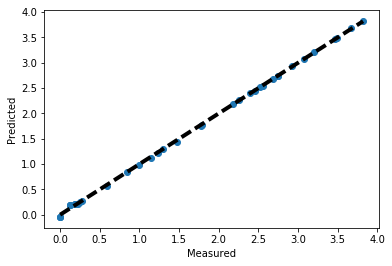

In [42]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
y

OutputPower
0          0.00
1          0.23
2          0.59
3          1.79
4          2.75
5          2.75
6          3.49
7          3.82
8          2.56
9          3.20
10         2.52
11         1.78
12         0.84
13         0.12
14         0.12
15         0.12
16         0.00
17         0.25
18         1.23
19         2.25
20         2.68
21         2.46
22         3.07
23         3.67
24         3.46
25         2.93
26         2.18
27         0.99
28         0.19
29         0.19
30         0.19
31         0.00
32         0.28
33         1.30
34         2.40
35         1.48
36         1.15